# Linear Regression

In this session, we are going to analyze the data and use the linear regression to get the prediction line.

In [23]:
import numpy as np
import matplotlib.pyplot as plt

## 01 Define the function

* Model -           predict the result
* Cost Function -   calculate the loss
* Update -          perform gradient descent

In [118]:
def model (x, w, b) :
    return w * x + b

def Derivative_w (x, y, w, b) :
    summary = np.sum ((model (x, w, b) - y) * x)
    return ((1 / len (x)) * summary)

def Derivative_b (x, y, w, b) :
    summary = np.sum ((model (x, w, b) - y))
    return ((1 / len (x)) * summary)

def CostFunc (output, y) :
    f = np.sum (np.power (output - y, 2))
    f = f / (2 * len (output))
    return f
    
def update (x, y, w, b, lr) :
    temp_w = w - lr * Derivative_w (x, y, w, b)
    temp_b = b - lr * Derivative_b (x, y, w, b)
    return temp_w, temp_b


## 02 Get the data

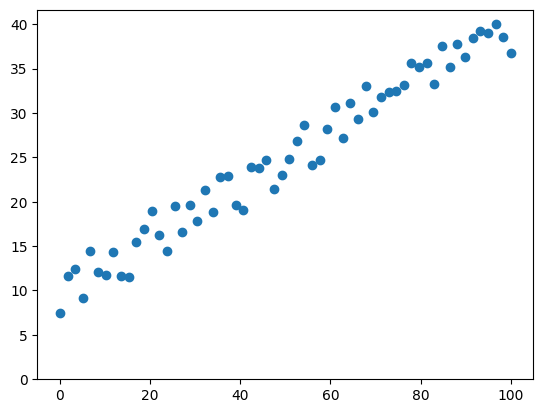

In [120]:
x = np.linspace (0, 100, 60)
rand_array = np.random.rand (60, )
rand_array = np.divide ((rand_array - np.mean (rand_array)), (np.max (rand_array) - np.min (rand_array)) * 2.5)
y = 0.3 * x + 10 + 15 * rand_array

plt.scatter (x, y)

plt.ylim (0)
plt.show ()

## 03 Gradient Descent

-1.5 	 10
0.3012088199714492 	 10.026521022068025


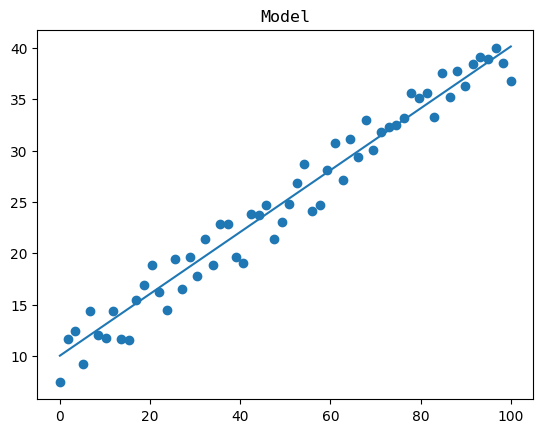

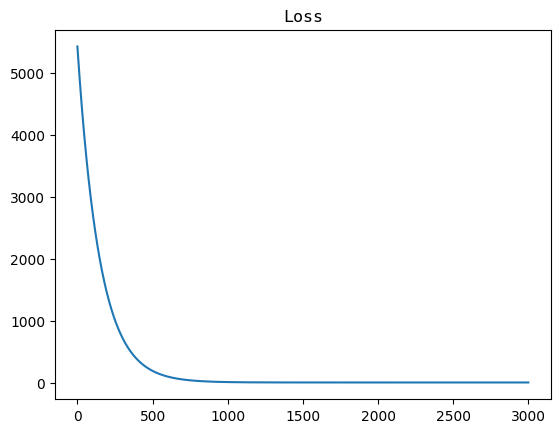

In [139]:
x_ = x
y_ = y

# Initialize the parameter
w = -1.5
b = 10
LR = 0.000001
epoches = 3000

print (w, "\t", b)

losses = []

# Perform Gradient Descent
for epoch in range (epoches) :
    w, b = update (x_, y_, w, b, LR)
    pred = model (x_, w, b)
    loss = CostFunc (pred, y_)
    losses.append (loss)

print (w, "\t", b)

# plot the real point and the model prediction
plt.scatter (x_, y_)
plt.plot (x_, pred)
plt.title ("Model", fontdict={"family": "Hack"})

plt.show ()

# plot the losses
plt.plot (range (epoches), losses)
plt.title ("Loss", fontdict={"family": "Hack"})
plt.show ()
    

## 04 After Normalized

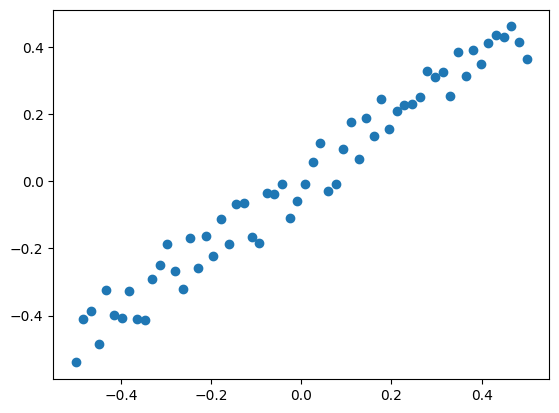

In [167]:
u_x = np.mean (x)
x_max = np.max (x)
x_min = np.min (x)
u_y = np.mean (y)
y_max = np.max (y)
y_min = np.min (y)

x_1 = (x - u_x) / (x_max - x_min)
y_1 = (y - u_y) / (y_max - y_min)

plt.scatter (x_1, y_1)
plt.show ()



0.3064893119281687 	 9.675534403591566


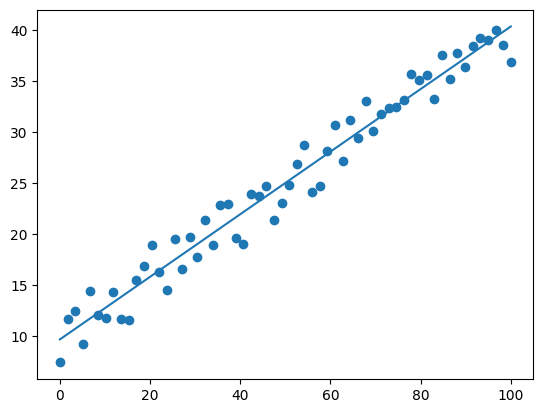

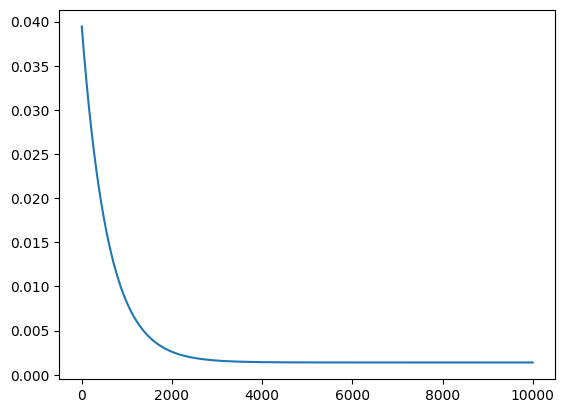

In [175]:
w = 0
b = 0
LR = 0.01
epoches = 10000

losses = []

for epoch in range (epoches) :
    w, b = update (x_1, y_1, w, b, LR)
    pred = model (x_1, w, b)
    loss = CostFunc (pred, y_1)
    losses.append (loss)

print (w / (x_max - x_min) * (y_max - y_min), 
       "\t", 
       (b - u_x / (x_max - x_min) * w) * (y_max - y_min) + u_y)
plt.scatter (x, y)
plt.plot (x, pred * (y_max - y_min) + u_y)
plt.show ()

plt.plot (range (epoches), losses)
plt.show ()